In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [2]:
from keras.datasets import mnist
data = mnist.load_data()

In [3]:
(X_train, y_train), (X_test, y_test) = data
print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9]


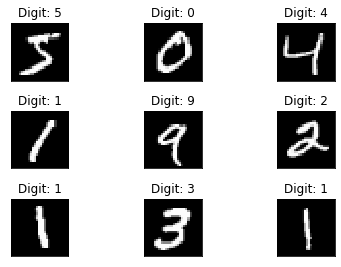

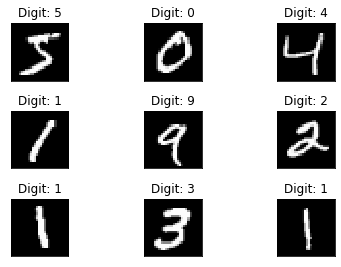

In [4]:
#Plotting the figures in MNIST
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [5]:
X_train1, X_test1 = [], []
for i in range(len(X_train)):
    X_train1.append(X_train[i].reshape(-1))

for i in range(len(X_test)):
    X_test1.append(X_test[i].reshape(-1))

X_train = np.array(X_train1)
X_test = np.array(X_test1)

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [6]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 784)
Y_train: (60000, 10)
X_test:  (10000, 784)
Y_test:  (10000, 10)


# Running DNN network with one layer

In [7]:
from keras.layers import Flatten, Dense, Input, ReLU
from keras.models import Sequential
from tensorflow.keras import backend as K
from keras import Model

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

model.add(Dense(units=100, activation='relu', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=25, verbose=False, validation_split=.2)
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

In [9]:
loss0, accuracy0 = loss, accuracy

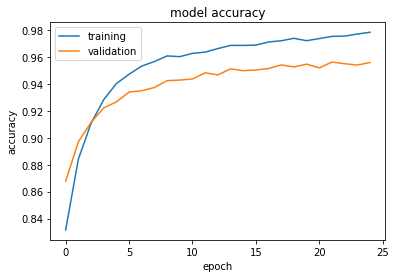

Test loss: 0.296
Test accuracy: 0.958


In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Running a Deep Neural Net with 10 Hidden Layers

In [11]:
model = Sequential()

model.add(Dense(units=10, activation='relu', input_shape=(image_size,)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))

model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [12]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=25, verbose=False, validation_split=.2)
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

In [13]:
loss1, accuracy1 = loss, accuracy

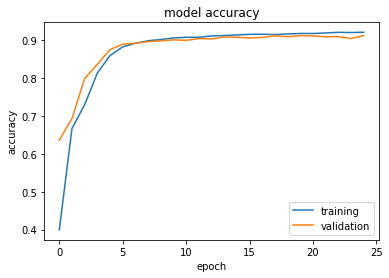

Test loss: 0.363
Test accuracy: 0.907


In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# PART 2- Assessing the quality of features generated

In [15]:
model = Sequential()
inp = Input(shape = (image_size,))
d11 = Dense(units=10)(inp)
d1 = ReLU()(d11)
d22 = Dense(units=10)(d1)
d2 = ReLU()(d22)
d33 = Dense(units=10)(d2)
d3 = ReLU()(d33)
d44 = Dense(units=10)(d3)
d4 = ReLU()(d44)
d55 = Dense(units=10)(d4)
d5 = ReLU()(d55)
d66 = Dense(units=10)(d5)
d6 = ReLU()(d66)
d77 = Dense(units=10)(d6)
d7 = ReLU()(d77)
d88 = Dense(units=10)(d7)
d8 = ReLU()(d88)
d99 = Dense(units=10)(d8)
d9 = ReLU()(d99)
d1010 = Dense(units=10)(d9)
d10 = ReLU()(d1010)
out = Dense(units=num_classes, activation='softmax')(d10)
model = Model(inp, out)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                7850      
_________________________________________________________________
re_lu (ReLU)                 (None, 10)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 10)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 10)               

In [16]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=25, verbose=False, validation_split=.2)
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

In [17]:
loss2, accuracy2 = loss, accuracy

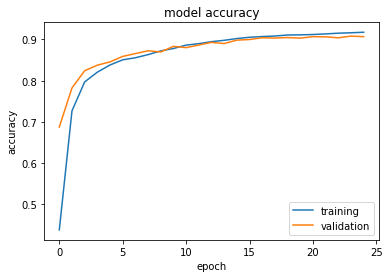

Test loss: 0.363
Test accuracy: 0.904


In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [19]:
model_l5 = Model(inp, d5)
model_l7 = Model(inp, d7)
model_l10 = Model(inp, d10)

X_train_5 = model_l5.predict(X_train)
X_train_7 = model_l7.predict(X_train)
X_train_10 = model_l10.predict(X_train)

X_test_5 = model_l5.predict(X_test)
X_test_7 = model_l7.predict(X_test)
X_test_10 = model_l10.predict(X_test)

sc = StandardScaler()
X_train_5_ = sc.fit_transform(X_train_5)
X_test_5_ = sc.transform(X_test_5)
sc = StandardScaler()
X_train_7_ = sc.fit_transform(X_train_7)
X_test_7_ = sc.transform(X_test_7)
sc = StandardScaler()
X_train_10_ = sc.fit_transform(X_train_10)
X_test_10_ = sc.transform(X_test_10)

In [20]:
NN = KNeighborsClassifier(n_neighbors = 5)
NN.fit(X_train_5_,y_train)
y_pred= NN.predict(X_test_5_)
accuracy3 = metrics.accuracy_score(y_test,y_pred)

In [21]:
NN = KNeighborsClassifier(n_neighbors = 5)
NN.fit(X_train_7_,y_train)
y_pred = NN.predict(X_test_7_)
accuracy4 = metrics.accuracy_score(y_test,y_pred)

In [22]:
NN = KNeighborsClassifier(n_neighbors = 5)
NN.fit(X_train_10_,y_train)
y_pred = NN.predict(X_test_10_)
accuracy5 = metrics.accuracy_score(y_test,y_pred)

In [23]:
print("Accuracy And Loss For 1 layer 100 neurons network is {} and {}".format(accuracy0, loss0))
print("Accuracy And Loss For 10 layer 10 neurons network is {} and {}".format(accuracy1, loss1))

print("Accuracy for Output of 5th Layer of network when used in a kNN (neighbours = 5) is {}".format(accuracy3))
print("Accuracy for Output of 7th Layer of network when used in a kNN (neighbours = 5) is {}".format(accuracy4))
print("Accuracy for Output of 10th Layer of network when used in a kNN (neighbours = 5) is {}".format(accuracy5))

Accuracy And Loss For 1 layer 100 neurons network is 0.9581000208854675 and 0.29597076773643494
Accuracy And Loss For 10 layer 10 neurons network is 0.9071999788284302 and 0.3628648817539215
Accuracy for Output of 5th Layer of network when used in a kNN (neighbours = 5) is 0.8939
Accuracy for Output of 7th Layer of network when used in a kNN (neighbours = 5) is 0.8928
Accuracy for Output of 10th Layer of network when used in a kNN (neighbours = 5) is 0.8916
